In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_csv('D:/Chools/Day_07/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['Channel', 'Region'])
y = data['Channel']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9204545454545454


In [10]:
# kNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("kNN Accuracy:", knn_accuracy)

kNN Accuracy: 0.8977272727272727


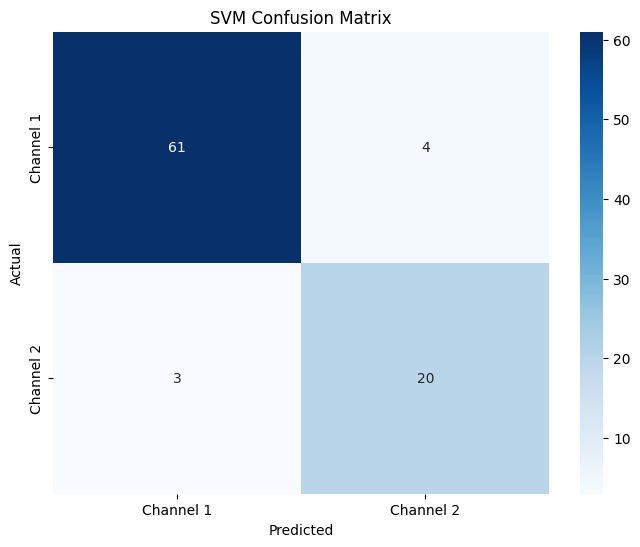

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for SVM
svm_cm = confusion_matrix(y_test, svm_pred)

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Channel 1', 'Channel 2'], yticklabels=['Channel 1', 'Channel 2'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

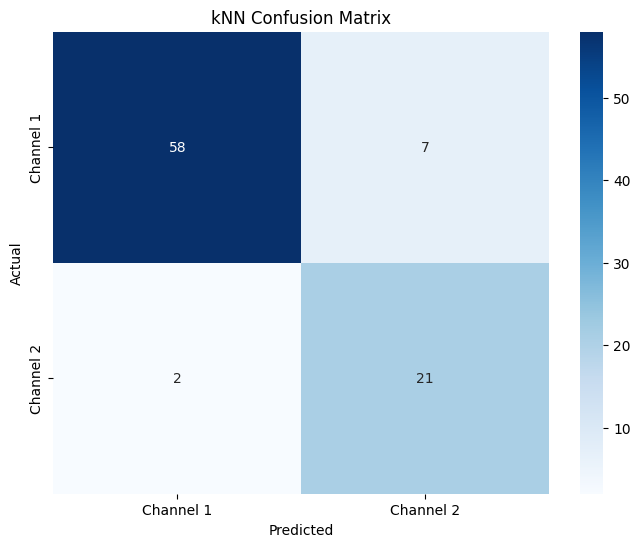

In [12]:
# Compute confusion matrix for kNN
knn_cm = confusion_matrix(y_test, knn_pred)

# Plot confusion matrix for kNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Channel 1', 'Channel 2'], yticklabels=['Channel 1', 'Channel 2'])
plt.title('kNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

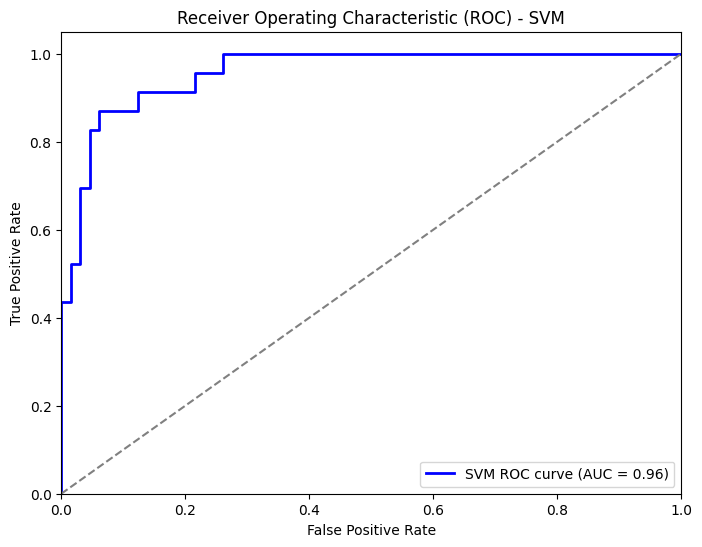

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area for SVM
svm_probs = svm_model.decision_function(X_test_scaled)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs, pos_label=2)
svm_auc = roc_auc_score(y_test, svm_probs)

# Plot SVM ROC curve
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='blue', lw=2, label=f'SVM ROC curve (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc="lower right")
plt.show()


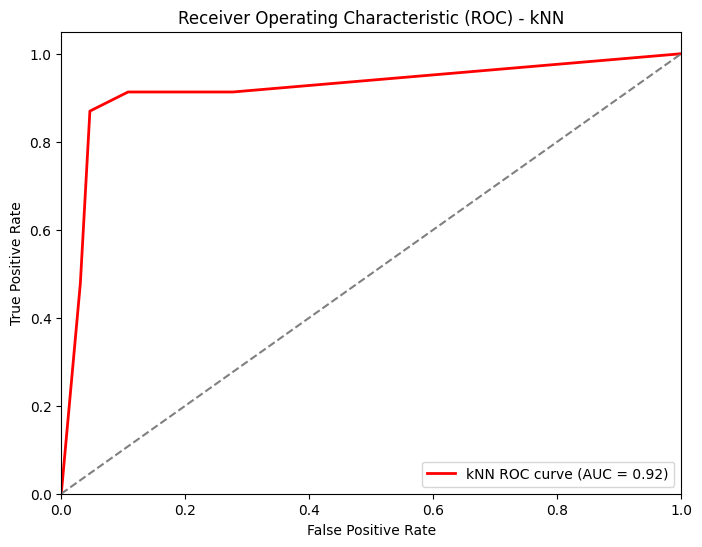

In [14]:
# Compute ROC curve and ROC area for kNN
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs, pos_label=2)
knn_auc = roc_auc_score(y_test, knn_probs)

# Plot kNN ROC curve
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='red', lw=2, label=f'kNN ROC curve (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - kNN')
plt.legend(loc="lower right")
plt.show()

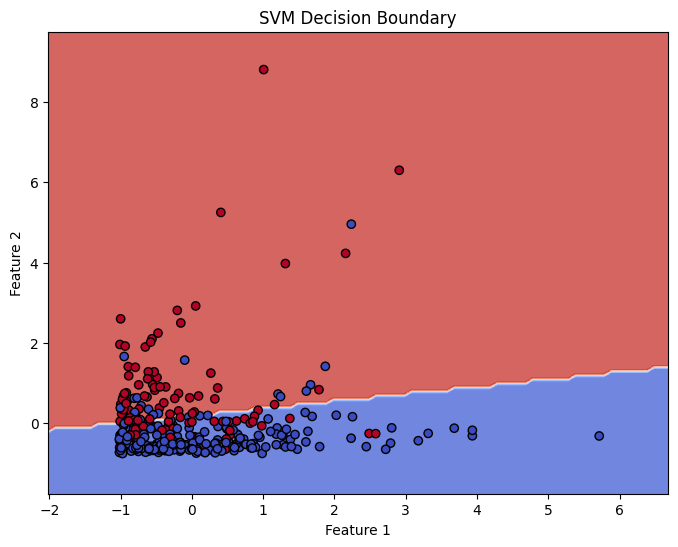

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = 0.1  # step size in the mesh

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Train SVM model
svm_model.fit(X_train_scaled[:, :2], y_train)  # Considering only the first two features for visualization

# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_train_scaled[:, :2], y_train, svm_model)
plt.title('SVM Decision Boundary')
plt.show()
